# 1. Import Libraries

In [23]:
import os
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data

* Define all files url
* Write function to read csv from Github url
* Save to DataFrame


In [2]:
annex1 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex1.csv'
annex2 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex2.csv'
annex3 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex3.csv'
annex4 = 'https://raw.githubusercontent.com/prattapong/Data-Science-Portfolio/main/Projects/Supermaket%20Sales%20Data/data/annex4.csv'

In [3]:
def get_df_from_url(url):
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Create a file-like object from the raw content
        csv_content = StringIO(response.text)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_content)

        # Return DataFrame
        return df
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")

In [4]:
df_item = get_df_from_url(annex1)
df_transaction = get_df_from_url(annex2)
df_wholesale = get_df_from_url(annex3)
df_loss = get_df_from_url(annex4)

# 3. Merge data

In [7]:
def merge_all_df(df_transaction: pd.DataFrame = df_transaction,
                 df_item: pd.DataFrame = df_item,
                 df_wholesale: pd.DataFrame = df_wholesale,
                 df_loss: pd.DataFrame = df_loss):

    df_merge = df_transaction.merge(df_item,
                                    how = 'left',
                                    on = 'Item Code')
    df_merge = df_merge.merge(df_wholesale,
                            how = 'left',
                            on = ['Date', 'Item Code'])
    df_merge = df_merge.merge(df_loss.drop('Item Name', axis = 1),
                            how = 'left',
                            on = 'Item Code')
    
    return df_merge

In [8]:
df_merge = merge_all_df()
df_merge.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,2.10,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,1011010101,Flower/Leaf Vegetables,7.03,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,1011010101,Flower/Leaf Vegetables,4.60,13.70


# 3. EDA

## 3.1 Statistical Summary

In [9]:
df_item.groupby('Item Code', as_index = False).nunique().sort_values(by = 'Category Name', ascending = False).head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,1,1,1
172,102900011032480,1,1,1
159,102900011032114,1,1,1
160,102900011032145,1,1,1
161,102900011032176,1,1,1


In [10]:
df_item.shape[0] == df_item['Item Code'].nunique()

True

Item Code and has no duplication

In [11]:
display(df_merge.describe(include = 'all'))

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Code,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
count,878503,878503,8.785030e+05,878503.000000,878503.000000,878503,878503,878503,8.785030e+05,878503,878503.000000,878503.000000
unique,1085,849632,NaN,NaN,NaN,2,2,242,NaN,6,NaN,NaN
top,2021-02-10,10:05:12.655,NaN,NaN,NaN,sale,No,Wuhu Green Pepper (1),NaN,Flower/Leaf Vegetables,NaN,NaN
freq,3747,6,NaN,NaN,NaN,878042,831137,69945,NaN,331968,NaN,NaN
mean,NaN,NaN,1.030313e+14,0.536112,8.917144,NaN,NaN,NaN,1.011010e+09,NaN,5.663150,10.122526
std,NaN,NaN,7.174368e+11,0.400087,6.311265,NaN,NaN,NaN,2.582929e+02,NaN,4.229638,4.741439
min,NaN,NaN,1.029000e+14,-9.082000,0.100000,NaN,NaN,NaN,1.011010e+09,NaN,0.010000,0.000000
25%,NaN,NaN,1.029000e+14,0.290000,4.900000,NaN,NaN,NaN,1.011010e+09,NaN,3.000000,6.270000
50%,NaN,NaN,1.029000e+14,0.435000,7.900000,NaN,NaN,NaN,1.011010e+09,NaN,4.690000,9.430000
75%,NaN,NaN,1.029000e+14,0.742000,10.800000,NaN,NaN,NaN,1.011011e+09,NaN,7.010000,13.620000


In [12]:
df_merge.dtypes

Date                            object
Time                            object
Item Code                        int64
Quantity Sold (kilo)           float64
Unit Selling Price (RMB/kg)    float64
Sale or Return                  object
Discount (Yes/No)               object
Item Name                       object
Category Code                    int64
Category Name                   object
Wholesale Price (RMB/kg)       float64
Loss Rate (%)                  float64
dtype: object

## 3.2 Check Null

* Check whether there is any null in any rows
* Since it is a time series, we also need to check whether all datapoints are collected. Therefore, we check for the missing date in each category

In [95]:
print(f'Total null rows: {df_merge.isna().sum().sum()}')
if df_merge.isna().sum().sum() > 0:
    print(df_merge.isna().sum())
else:
    pass

Total null rows: 0


In [119]:
def get_category_max_min_date(df: pd.DataFrame,
                              category_name: str):
    
    # Slice DataFrame to Category Name
    df = df[df['Category Name'] == category_name]

    max_date = df['Date'].max()
    min_date = df['Date'].min()

    print(f'Category: {category_name}')
    print(f'Max date: {max_date} | Min date: {min_date}')

    date_range = pd.date_range(start=min_date, end=max_date, freq='D')

    # Find the missing dates
    missing_dates = date_range[~date_range.isin(df['Date'])]

    # Display the missing dates
    print(f'Number of Missing Dates: {len(missing_dates)}')

In [120]:
num_category = df_merge['Category Code'].nunique()
categories = df_merge['Category Name'].unique()
print(f'Total Category: {num_category}\nCategory lists:\n{categories}')

Total Category: 6
Category lists:
['Capsicum' 'Flower/Leaf\xa0Vegetables' 'Aquatic Tuberous Vegetables'
 'Edible Mushroom' 'Cabbage' 'Solanum']


In [121]:
for category in categories:
    get_category_max_min_date(df = df_merge,
                              category_name = category)

Category: Capsicum
Max date: 2023-06-30 00:00:00 | Min date: 2020-07-01 00:00:00
Number of Missing Dates: 10
Category: Flower/Leaf Vegetables
Max date: 2023-06-30 00:00:00 | Min date: 2020-07-01 00:00:00
Number of Missing Dates: 10
Category: Aquatic Tuberous Vegetables
Max date: 2023-06-30 00:00:00 | Min date: 2020-07-01 00:00:00
Number of Missing Dates: 10
Category: Edible Mushroom
Max date: 2023-06-30 00:00:00 | Min date: 2020-07-01 00:00:00
Number of Missing Dates: 10
Category: Cabbage
Max date: 2023-06-30 00:00:00 | Min date: 2020-07-01 00:00:00
Number of Missing Dates: 11
Category: Solanum
Max date: 2023-06-30 00:00:00 | Min date: 2020-07-01 00:00:00
Number of Missing Dates: 45


## 3.3 Visualize

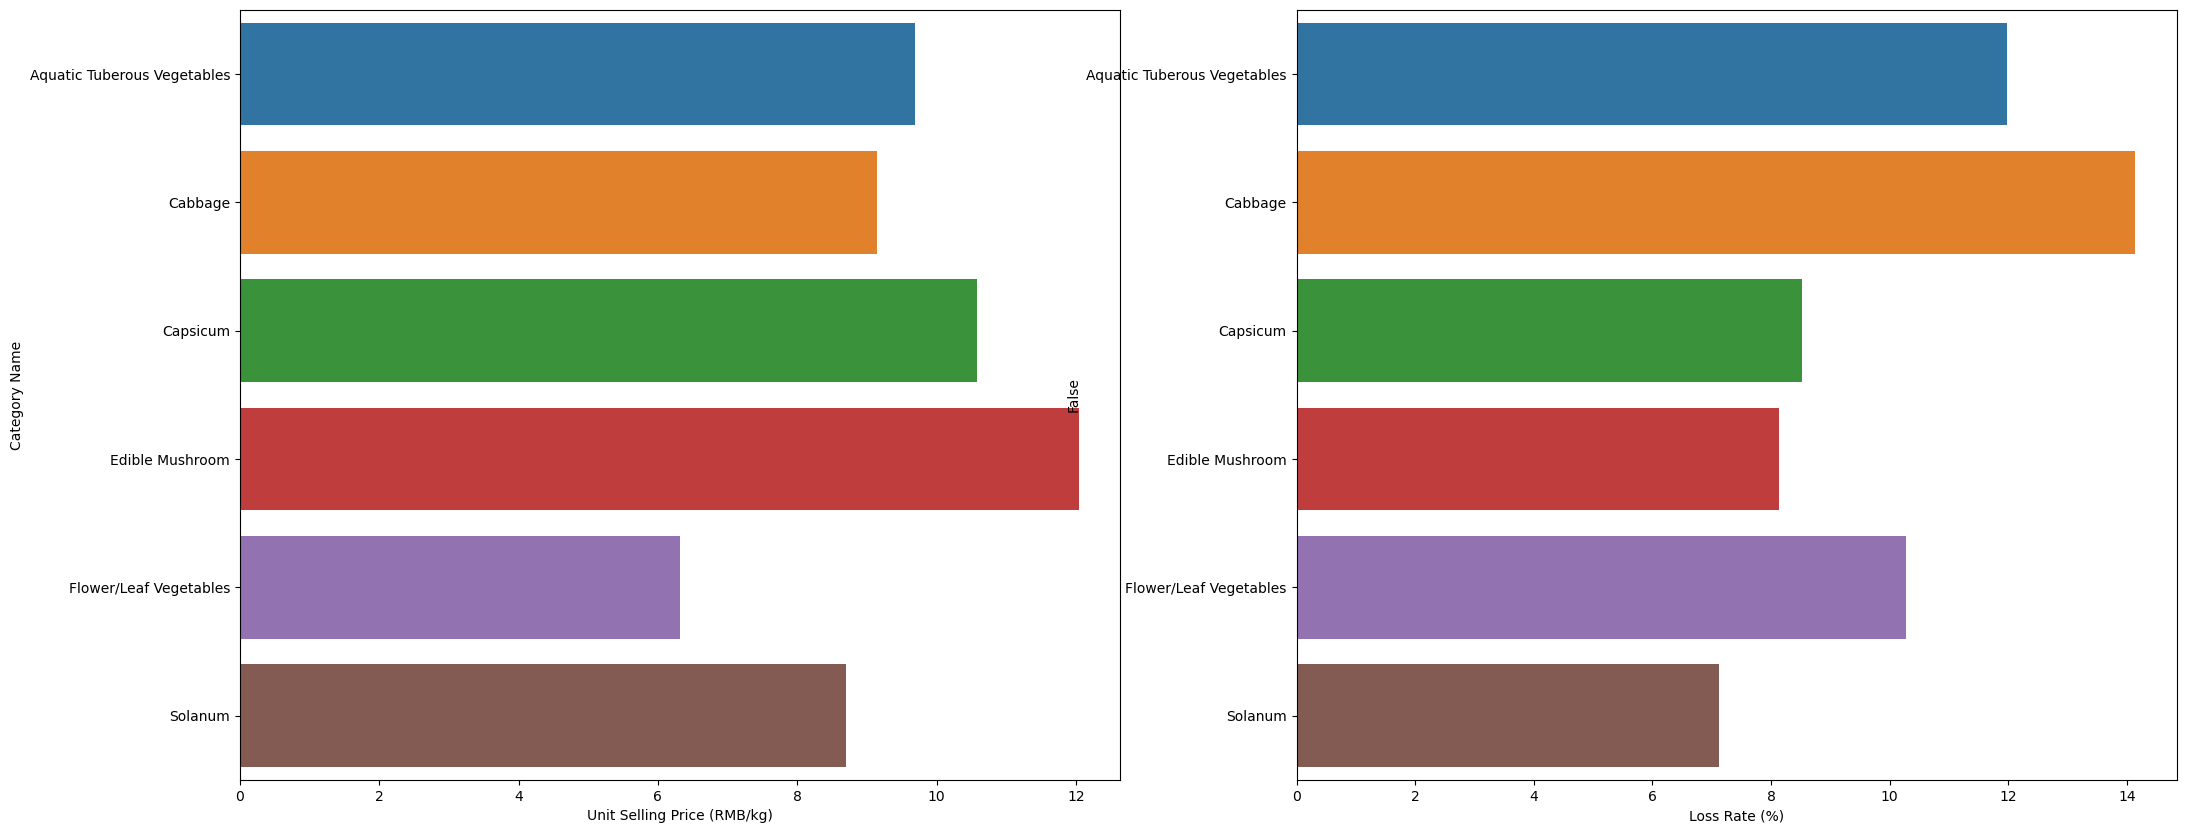

In [73]:
df_merge['Sales'] = df_merge['Quantity Sold (kilo)'] * df_merge['Unit Selling Price (RMB/kg)']

fig, ax = plt.subplots(1, 2, figsize=(25, 10))
sns.barplot(data = df_merge.groupby('Category Name', as_index = False)['Unit Selling Price (RMB/kg)'].mean(),
            y = 'Category Name',
            x = 'Unit Selling Price (RMB/kg)',
            ax = ax[0],)
sns.barplot(data = df_loss.merge(df_item.drop('Item Name', axis = 1),
                                 how = 'left',
                                 on = 'Item Code').groupby('Category Name', as_index = False)['Loss Rate (%)'].mean(),
            y = 'Category Name',
            x = 'Loss Rate (%)',
            ax = ax[1])
plt.ylabel(False)
plt.show()

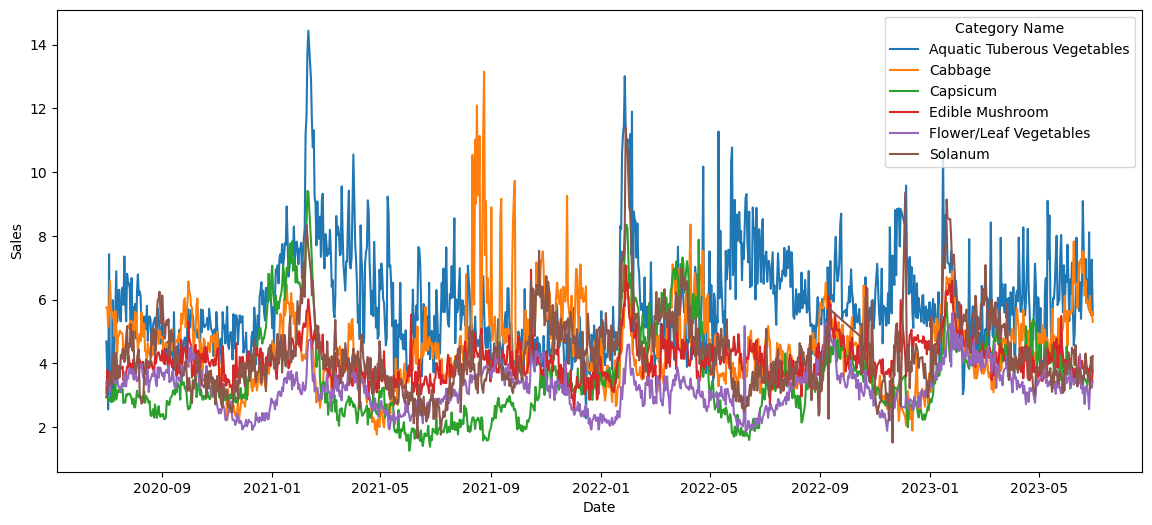

In [88]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

plt.figure(figsize = (14,6))
sns.lineplot(df_merge.groupby(['Category Name','Date'], as_index = False)['Sales'].mean(),
            x = 'Date',
            y = 'Sales',
            hue = 'Category Name')
plt.show()

## 3.4 Address Outliers in each Category

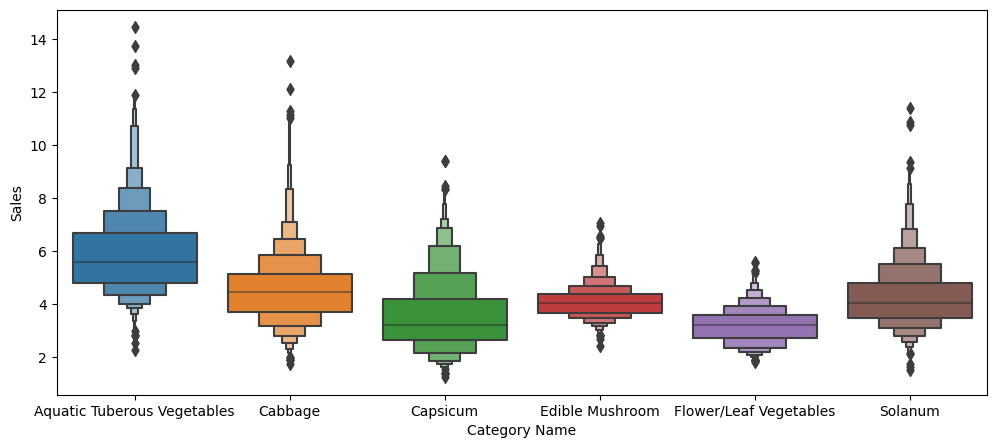

In [85]:
plt.figure(figsize=(12,5))
sns.boxenplot(data = df_merge.groupby(['Category Name', 'Date'], as_index = False)['Sales'].mean(),
              x = 'Category Name',
              y = 'Sales')
plt.show()

In [91]:
def get_outlier_rows(df: pd.DataFrame,
                     col: str,
                     category_name: str):
    
    # Slice DataFrame to Category Name
    df = df[df['Category Name'] == category_name]
    
    # Calculate quartile
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Print out
    print(f'Column name: {col} | Category: {category_name}')
    print(f'Total rows: {df.shape[0]} | Outliers: {outliers.shape[0]}')
    display(outliers.sort_values(by = col, ascending = False).head())

In [92]:
for category in categories:
    get_outlier_rows(df = df_merge.groupby(['Category Name', 'Date'], as_index = False)['Sales'].mean(),
                     col = 'Sales',
                     category_name = category)

Column name: Sales | Category: Capsicum
Total rows: 1085 | Outliers: 51


,Category Name,Date,Sales
2392,Capsicum,2021-02-09,9.404475
2393,Capsicum,2021-02-10,9.384910
2391,Capsicum,2021-02-08,8.438106
2743,Capsicum,2022-01-28,8.351510
2744,Capsicum,2022-01-29,8.339763


Column name: Sales | Category: Flower/Leaf Vegetables
Total rows: 1085 | Outliers: 15


,Category Name,Date,Sales
5268,Flower/Leaf Vegetables,2023-01-26,5.582425
5267,Flower/Leaf Vegetables,2023-01-25,5.561204
5134,Flower/Leaf Vegetables,2022-09-07,5.285581
5265,Flower/Leaf Vegetables,2023-01-23,5.238489
5044,Flower/Leaf Vegetables,2022-06-09,5.166464


Column name: Sales | Category: Aquatic Tuberous Vegetables
Total rows: 1085 | Outliers: 26


,Category Name,Date,Sales
224,Aquatic Tuberous Vegetables,2021-02-10,14.433284
223,Aquatic Tuberous Vegetables,2021-02-09,13.727990
573,Aquatic Tuberous Vegetables,2022-01-27,13.006744
225,Aquatic Tuberous Vegetables,2021-02-13,12.900000
580,Aquatic Tuberous Vegetables,2022-02-04,11.893179


Column name: Sales | Category: Edible Mushroom
Total rows: 1085 | Outliers: 29


,Category Name,Date,Sales
3828,Edible Mushroom,2022-01-28,7.072163
3723,Edible Mushroom,2021-10-15,6.936586
4182,Edible Mushroom,2023-01-25,6.586930
3830,Edible Mushroom,2022-01-30,6.506132
4179,Edible Mushroom,2023-01-22,6.487224


Column name: Sales | Category: Cabbage
Total rows: 1084 | Outliers: 27


,Category Name,Date,Sales
1502,Cabbage,2021-08-24,13.152857
1494,Cabbage,2021-08-16,12.090000
1501,Cabbage,2021-08-23,11.272500
1497,Cabbage,2021-08-19,11.132500
1492,Cabbage,2021-08-14,11.018667


Column name: Sales | Category: Solanum
Total rows: 1050 | Outliers: 36


,Category Name,Date,Sales
5997,Solanum,2022-01-28,11.392755
5998,Solanum,2022-01-29,10.856532
5999,Solanum,2022-01-30,10.746882
6267,Solanum,2022-12-04,9.344000
6312,Solanum,2023-01-19,9.140313
